## Kakadu netCDF data analysis

In [1]:
%matplotlib inline
import xarray as xr

In [2]:
kakadu = xr.open_dataset('kakadu_sar.nc',chunks={'time':1})

In [3]:
kakadu.cover_classes.data

,Array,Chunk
Bytes,47.01 GB,331.05 MB
Shape,"(142, 8348, 4957)","(1, 8348, 4957)"
Count,143 Tasks,142 Chunks
Type,float64,numpy.ndarray


In [4]:
#mamukala segment
mamslice = kakadu.isel(time=30).sel(x=slice(58537.5,70712.5),y=slice(-1340487.5,-1333912.5))

In [ ]:
kakadu.isel(time=140).cover_classes.plot(vmin=0,vmax=8.01,levels=10,cmap='Set1')

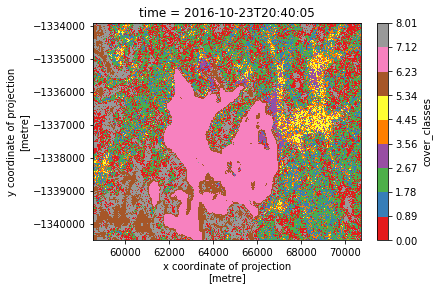

In [129]:
mamslice = kakadu.isel(time=5).sel(x=slice(58537.5,70712.5),y=slice(-1340487.5,-1333912.5)).compute()
mamslice.cover_classes.plot(vmin=0,vmax=8.01,levels=10,cmap='Set1')

In [16]:
kakadu.cover_classes

<xarray.DataArray 'cover_classes' (time: 142, y: 8348, x: 4957)>
dask.array<shape=(142, 8348, 4957), dtype=float64, chunksize=(5, 8348, 4957)>
Coordinates:
  * x        (x) float64 -1.334e+04 -1.331e+04 ... 1.105e+05 1.106e+05
  * y        (y) float64 -1.482e+06 -1.482e+06 ... -1.274e+06 -1.274e+06
  * time     (time) datetime64[ns] 2016-09-28T20:47:26 ... 2019-02-22T20:40:15
Attributes:
    grid_mapping:  crs

In [41]:
import numpy as np
land_arr = np.array([3,3,2,1,2,2,4,0,3])

In [31]:

def map_cover_classes(i):
    return float(land_arr[int(i)]) if ~np.isnan(i) else i

vec_map = np.vectorize(map_cover_classes)

In [82]:
mamslice.cover_classes.shape

(264, 488)

In [67]:
#mamukala segment
mamslice = kakadu.isel(time=24).sel(x=slice(58537.5,70712.5),y=slice(-1340487.5,-1333912.5)).compute()
mamuclasses = xr.apply_ufunc(vec_map,mamslice.cover_classes)

In [3]:
import seaborn as sns
pal = [
       sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]
       ]

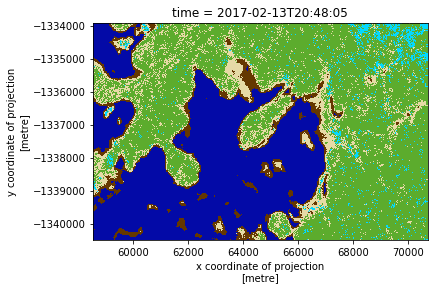

In [69]:


mamuclasses.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False)

In [40]:
mamslice.cover_classes

<xarray.DataArray 'cover_classes' (y: 264, x: 488)>
dask.array<shape=(264, 488), dtype=float64, chunksize=(264, 488)>
Coordinates:
  * x        (x) float64 5.854e+04 5.856e+04 5.859e+04 ... 7.069e+04 7.071e+04
  * y        (y) float64 -1.34e+06 -1.34e+06 -1.34e+06 ... -1.334e+06 -1.334e+06
    time     datetime64[ns] 2017-03-21T20:48:08
Attributes:
    grid_mapping:  crs

In [7]:
kakadu_dry = kakadu.isel(time=55)

In [9]:
kakadu_dry = kakadu_dry.compute()

In [21]:
kakadu_dry_cover = xr.apply_ufunc(vec_map,kakadu_dry.cover_classes)

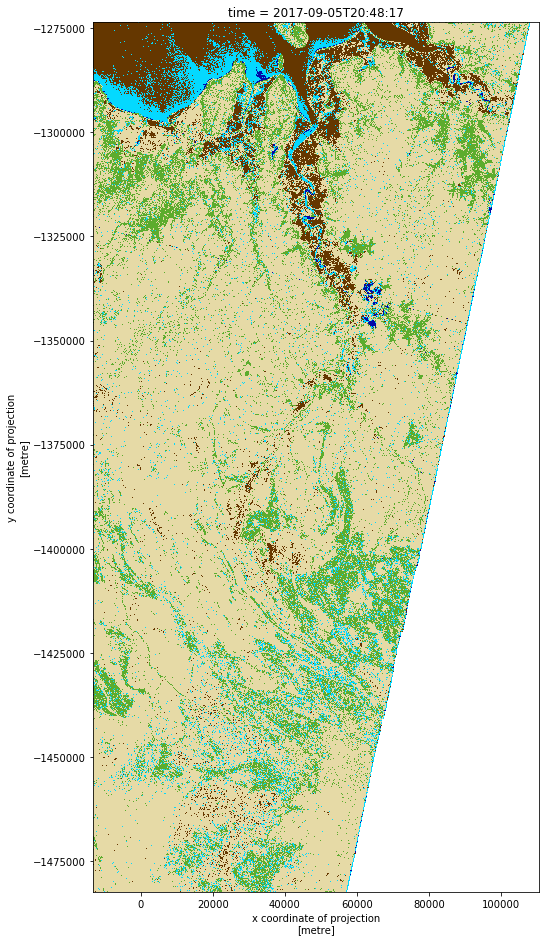

In [8]:
kakadu_dry.cover_classes.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False,figsize=(8,16))

In [6]:
kakadu_wet2 = kakadu.isel(time=20)

In [71]:
kakadu_wet2

<xarray.Dataset>
Dimensions:        (x: 4957, y: 8348)
Coordinates:
  * x              (x) float64 -1.334e+04 -1.331e+04 ... 1.105e+05 1.106e+05
  * y              (y) float64 -1.482e+06 -1.482e+06 ... -1.274e+06 -1.274e+06
    time           datetime64[ns] 2017-02-13T20:48:05
Data variables:
    crs            int32 ...
    cover_classes  (y, x) float64 dask.array<shape=(8348, 4957), chunksize=(8348, 4957)>
Attributes:
    date_created:           2019-08-27T12:58:09.760032
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.7' ...
    geospatial_bounds:      POLYGON ((131.877912290645 -14.0026491494316,131....
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     -14.002649149431633
    geospatial_lat_max:     -12.082642861683446
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     131.8779122906454
    geospatial_lon_max:     133.01120379411032
    geospatial_lon_units:   degrees_east

In [72]:
kakadu_wet2 = kakadu_wet2.compute()

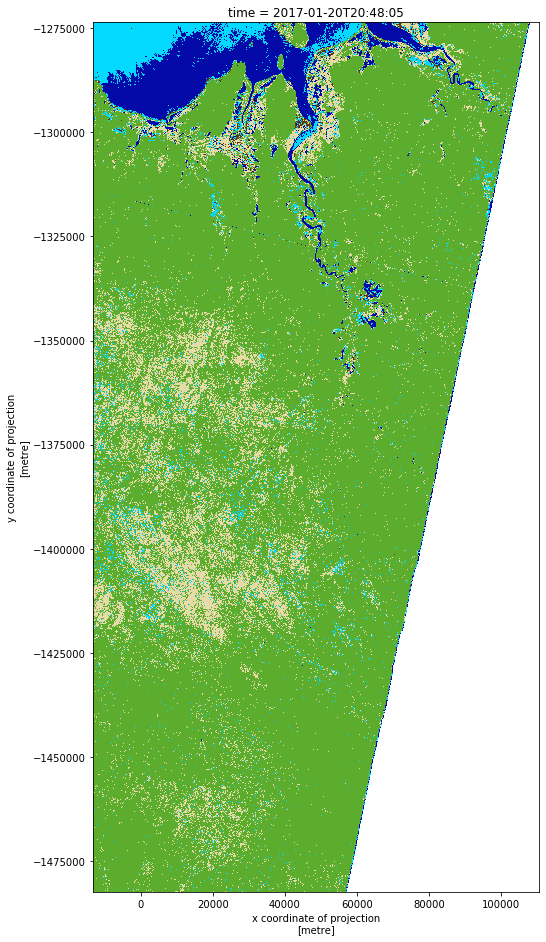

In [8]:
kakadu_wet2.cover_classes.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False,figsize=(8,16))

In [13]:
import gc; gc.collect()

752

In [3]:
#give the numpy array a good ol compute
kakadu_jan_composite=kakadu.sel(time=slice('2017-01-01','2017-01-31')).compute()
kakadu_jul_composite=kakadu.sel(time=slice('2017-07-01','2017-07-31')).compute()

In [18]:
kakadu_apr_composite = kakadu.sel(time=slice('2017-04-01','2017-04-30')).compute()

In [22]:
kakadu_oct_composite = kakadu.sel(time=slice('2017-10-01','2017-10-31')).compute()

In [5]:

import fastmode

In [6]:
jan_comp_data=fastmode.mode_class(kakadu_jan_composite.cover_classes.data,num_classes=5)
jul_comp_data=fastmode.mode_class(kakadu_jul_composite.cover_classes.data,num_classes=5)

In [19]:
apr_comp_data=fastmode.mode_class(kakadu_apr_composite.cover_classes.data,num_classes=5)

In [23]:
oct_comp_data=fastmode.mode_class(kakadu_oct_composite.cover_classes.data,num_classes=5)

In [7]:
plottable = xr.DataArray(jul_comp_data,dims={'x':kakadu_jan_composite.x,'y':kakadu_jan_composite.y})

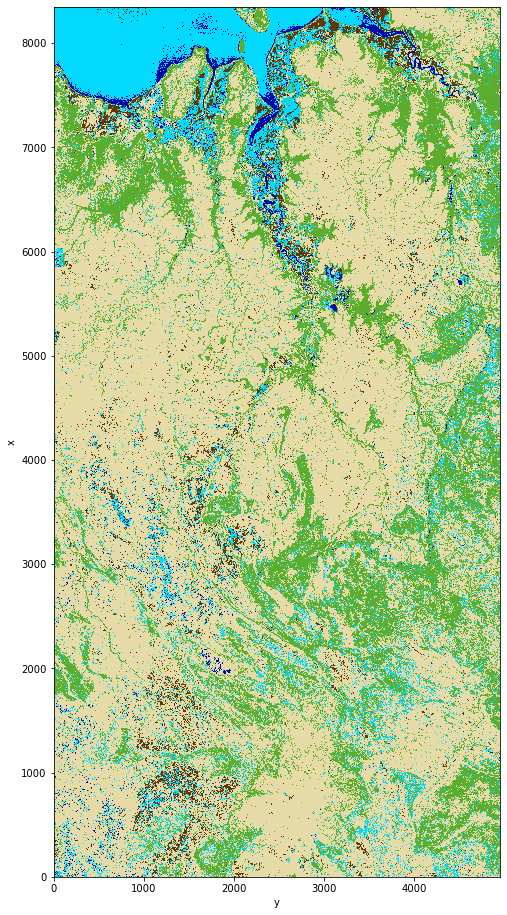

In [8]:
import seaborn as sns
pal = [
       sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]
       ]

plottable.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False,figsize=(8,16))

In [171]:
del(kakadu_wet)

In [24]:
import gc
gc.collect()

4

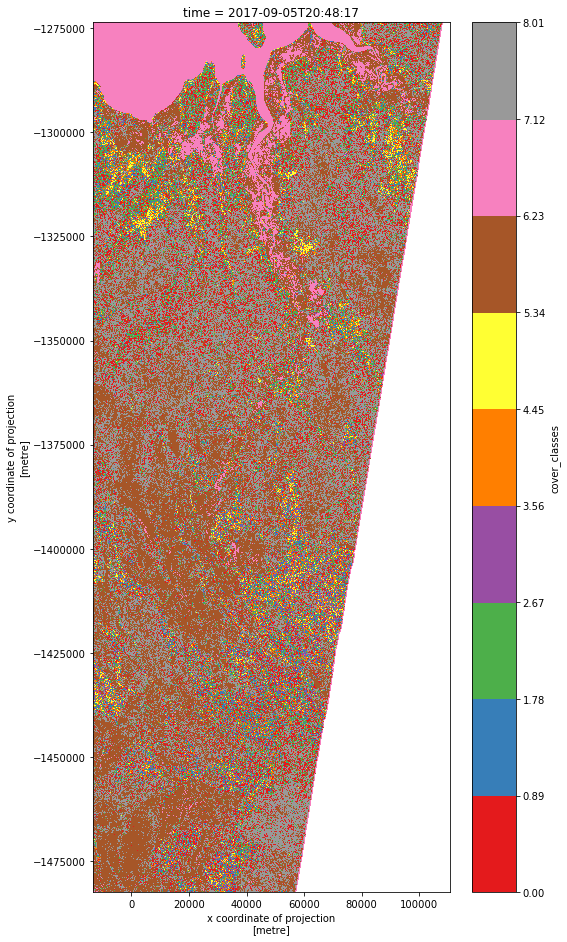

In [176]:
kakadu_dry.cover_classes.plot(vmin=0,vmax=8.01,levels=10,cmap='Set1',figsize=(8,16))

In [1]:
import numpy as np
import datacube
dcO = datacube.Datacube()

In [2]:
#load October's landsat imagery
import fiona
from datacube.utils import geometry
import rasterio.features
# Import external functions from dea-notebooks
import sys
sys.path.append('./10_Scripts/')
import DEAPlotting, DEADataHandling

#load the 'Kakadu' polygon from the Ramsar wetlands shapefile and set up a query to download data for it
shp_path='/g/data/r78/rjd547/Ramsar_Wetlands/shapefiles/Ramsar_exploded3.shp'
shapes=fiona.open(shp_path,'r')

crs=geometry.CRS(shapes.crs_wkt)

#Kakadu is at index 12 in this shapefile
shape=shapes[12]
shape_geometry=shape['geometry']
geom=geometry.Geometry(shape_geometry,crs=crs)

query = {'geopolygon': geom,
         'time': ('2017-10-01', '2017-10-31')
         }



In [3]:
#optical load
opt_oct = DEADataHandling.load_clearlandsat(dcO,query)

Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 3 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


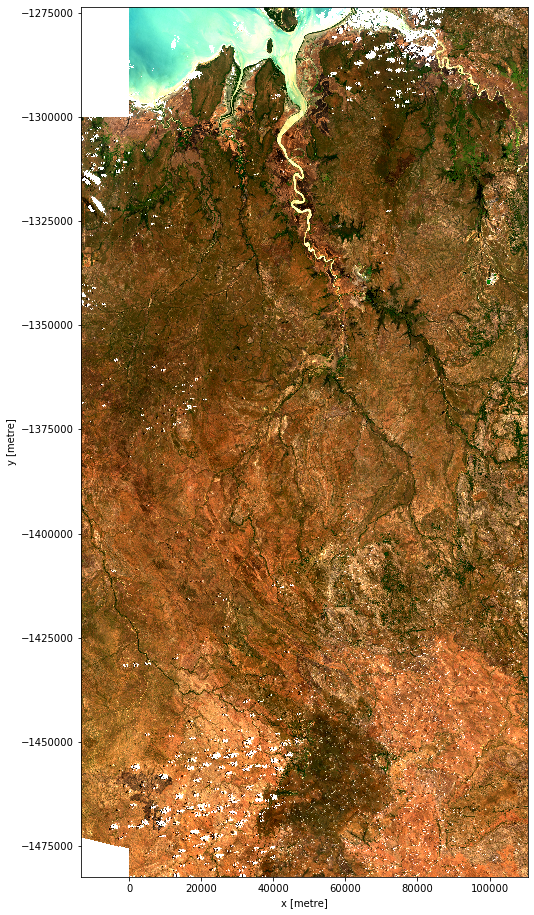

In [5]:
DEAPlotting.rgb(opt_oct.mean(dim='time'),bands=['red','green','blue'],figsize=(8,16),size=None)